In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stanford-earthquake-dataset-stead/merge.hdf5
/kaggle/input/stanford-earthquake-dataset-stead/merge.csv


**RESUMEN**
El proyecto presente explora la aplicación de métodos de minería de datos para la detección de terremotos empleando la base de datos STanford EArthquake Dataset (STEAD).  Se tomará Python como herramienta durante todo el estudio. El proyecto se lleva a cabo con el método KDD.  

**INTRODUCCIÓN**

La actual disponibilidad de grandes volúmenes de datos sísmicos y los avances en técnicas de Machine Learning brindan oportunidades para mejorar nuestra comprensión y capacidad de respuesta frente a los eventos sísmicos. La base de datos que se empleará es la STEAD, que contiene un conjunto de datos sísmicos meticulosamente curado y se considera un recurso fundamental para los investigadores del campo de la ciencia de datos aplicada a la sismología. Este proyecto Capstone se propone explorar y aplicar técnicas avanzadas de minería de datos en Python para analizar STEAD.

Se utilizará Python, un lenguaje de programación líder en ciencia de datos por su sintaxis clara y legible y sus librerías de análisis y aprendizaje automático como Pandas, NumPy, Scikit-learn, y TensorFlow.  Este estudio aborda el desafío de procesar y analizar grandes volúmenes de datos de señales sísmicas. Se probarán distintas técnicas, como la regresión múltiple o GSP, para descubrir patrones y correlaciones significativas en los datos que puedan ofrecer perspectivas nuevas sobre los factores más influyentes en la magnitud de los terremotos.

Este documento se organiza de la siguiente manera: inicialmente, se realiza un preprocesamiento de los datos centrado en los metadatos.  Más adelante se emplean algunas técnicas vistas durante el cuatrimestre para obtener la máxima precisión de detección de terremotos.

**OBJETIVOS**

El objetivo general del proyecto es desarrollar y validar un modelo predictivo de minería de datos empleando el dataset STEAD para mejorar la detección de eventos sísmicos, ya sean terremotos o ruido, buscando la mayor precisión posible.

En cuanto a los objetivos específicos, se tienen en cuenta los siguientes:
* Explorar los datos y prepararlos mediante preprocesamiento.
* Desarrollar modelos de Data Mining.
* Evaluar la eficacia de los modelos realizados y validarlos.
* Comprender cómo trabajar con bases de datos extensas y que contienen señales.


**APLICACIONES DEL PROYECTO**

* Predecir magnitud/ características de un terremoto puede ser útil para mejorar las alertas rápidas y así minimizar daños.
* Toma de decisiones sobre urbanismo y su planificación en zonas sísmicas.  Ayuda a arquitectos con la toma de decisiones.
* Mejorar y estudiar a fondo los modelos de riesgo sísmico.

**DESCRIPCIÓN DE LA BASE DE DATOS STEAD**

La base de datos STEAD (STanford EArthquake Dataset) es un conjunto de datos de señales sísmicas diseñado para el análisis y desarrollo de algoritmos de Machine Learning y Data Mining.  La aplicación de estos algoritmos se realiza para la detección y/o clasificación de eventos sísmicos o terremotos.  

STEAD es un conjunto muy extenso (91 GB) de más de un millón de muestras etiquetadas.  No solo se contemplan señales de terremotos, sino también ruidos de fondo sísmico.  Cada muestra de la base de datos está etiquetada como terremoto o ruido.

En cuanto a la estructura de datos: las muestras son señales unidimensionales con frecuencia de muestreo 100 Hz, en su mayoría recortadas a trozos de 60 segundos de duración, lo cual aporta uniformidad, característica ideal para métodos de minería de datos.  Además, a cada muestra le acompañan metadatos que incluyen: profundidad del hipocentro, magnitud, tiempo de origen, distancia entre epicentro y el sensor, coordenadas del epicentro y Signal to Noise Ratio (calidad de la señal sísmica).

**STEAD EN LA INVESTIGACIÓN Y DESARROLLO**
El dataset descrito es consistente y completo, lo que lo hace ideal para desarrolar modelos de predicción de terremotos.  Se pueden emplear técnicas para extraer las características de dominio temporal y frecuencial para analizar las características más informativas.  Además, es importante que se lleve a cabo la ingeniería de características para obtener los mejores resultados posibles.  

**CONSIDERACIONES**
Los terremotos y el ruido ocurren con frecuencia muy distinta, por lo que sería interesante aplicar técnicas de balanceo de clases o ajustar la función de pérdida para equilibrar la desproporción de las clases.  Aunque STEAD es una base de datos muy consistente y bien valorada, crear un modelo que generalice datos no vistos sigue siendo un desafío en el ámbito sismológico, pues se tienen en cuenta demasiados factores: ya solo de ubicación hay un amplio abanico de opciones.

Para trabajar con el dataset, utilizamos los servicios de kaggle que nos permiten guardar el input de manera persistente, lo cual es conveniente al ser un dataset de ~90GB.

In [2]:
import os
import pandas as pd

input_dir = '/kaggle/input/stanford-earthquake-dataset-stead/'
filename = 'merge.csv'
df_original = pd.read_csv(os.path.join(input_dir, filename), low_memory=False)
df_original.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Realizamos una copia del dataset, para ejecutar desde este punto las celdas, y no tener que volver a leer el dataset a pandas

In [3]:
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265657 entries, 0 to 1265656
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   network_code                      1265613 non-null  object 
 1   receiver_code                     1265657 non-null  object 
 2   receiver_type                     1265657 non-null  object 
 3   receiver_latitude                 1265657 non-null  float64
 4   receiver_longitude                1265657 non-null  float64
 5   receiver_elevation_m              1265657 non-null  float64
 6   p_arrival_sample                  1030231 non-null  float64
 7   p_status                          1030231 non-null  object 
 8   p_weight                          1030057 non-null  float64
 9   p_travel_sec                      1030231 non-null  float64
 10  s_arrival_sample                  1030231 non-null  float64
 11  s_status                          103

Se trata de un dataset con 1265657 filas y 35 columnas.

La variable trace_name es un identificador único para cada observación:

In [4]:
len(df['trace_name'].unique()) == len(df)

True

Por tanto, lo podemos utilizar como índice de fila.

In [5]:
df = df.set_index('trace_name')
df.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise


network_code, receiver_code, trace_start_time y trace_category se especifican en el trace_name  

trace_name = [receiver_code].[network_code]\_[trace_start_time]\_[trace_category]

Observaciones:
- trace_start_time se expresa como unión sin espacios de las unidades de tiempo
- trace_category toma valores NO y EV para categorías noise y earthquake_local respectivamente

Se convierten a formato fecha las variables source_origin_time y trace_start_time

In [6]:
df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], format='ISO8601')# format="%Y-%m-%d %H:%M:%S")
df['source_origin_time'] = pd.to_datetime(df['source_origin_time'], format='ISO8601')

In [7]:
df.iloc[0]['trace_start_time']

Timestamp('2015-10-21 05:55:00')

Se han recogido dos tipos de señales:  
- noise: sonidos no debidos a terremotos
- earthquake_local: terremotos que se encuentran en un radio menor a 350km

In [8]:
df.loc[:, 'trace_category'].unique()

array(['noise', 'earthquake_local'], dtype=object)

Para estudios que vamos a realizar, vamos dividir en dataframes uno por cada tipo de señal:

### Señales noise

Obtenemos un subdataset cuyas observaciones son señales noise, y podemos ver el ratio y el tamaño del subconjunto

In [9]:
df_noise = df.loc[df.loc[:, 'trace_category'] == 'noise']
size = len(df_noise)
print(f'len(df_noise)={size}, ratio={size/len(df)*100:.2f}%')
df_noise.head()

len(df_noise)=235426, ratio=18.60%


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise


En la documentación del dataset se muestra que las señales categorizadas como noise, solo cuentan con 8 variables y el resto toman valores NA, eliminamos las variables que tienen todos sus valores NA:

In [10]:
df_noise = df_noise.dropna(axis=1, how='all')
print(df_noise.shape)
df_noise.head()

(235426, 8)


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,trace_start_time,trace_category
trace_name,,,,,,,,
109C.TA_201510210555_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-10-21 05:55:00,noise
109C.TA_201511061450_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-06 14:50:00,noise
109C.TA_201511070220_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-07 02:20:00,noise
109C.TA_201511140515_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-11-14 05:15:00,noise
109C.TA_201512251850_NO,TA,109C,HH,32.8889,-117.1051,150.0,2015-12-25 18:50:00,noise


Una vez hecho esto, podemos comprobar si existen más valores NA, debidos a incosistencias.

In [11]:
print(f'Número total de NA en el dataframe: {(col_na:=df_noise.isna().sum()).sum()}')
df_noise_na = pd.DataFrame({'Valores NA': col_na})
df_noise_na

Número total de NA en el dataframe: 0


,Valores NA
network_code,0
receiver_code,0
receiver_type,0
receiver_latitude,0
receiver_longitude,0
receiver_elevation_m,0
trace_start_time,0
trace_category,0


Realizamos comprobaciones similares para los datos de terremotos.

### Señales noise

In [12]:
df_earthquakes = df.loc[df.loc[:, 'trace_category'] == 'earthquake_local']
size = len(df_earthquakes)
print(f'len(df_earthquakes)={size}, ratio={size/len(df)*100:.2f}%')
df_earthquakes.head()

len(df_earthquakes)=1030231, ratio=81.40%


,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category
trace_name,,,,,,,,,,,,,,,,,,,,,
109C.TA_20060723155859_EV,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.080000,...,ml,NaN,NaN,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960,earthquake_local
109C.TA_20061103155652_EV,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.879999,...,mb,NaN,NaN,0.91,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610,earthquake_local
109C.TA_20061103161223_EV,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.260000,...,ml,NaN,NaN,0.92,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700,earthquake_local
109C.TA_20061114133221_EV,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,17.280001,...,ml,NaN,NaN,0.93,103.26,281.6,[54.09999847 54.90000153 45.5 ],[[3152.]],2006-11-14 13:32:22.540,earthquake_local
109C.TA_20061127104640_EV,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,18.139999,...,ml,NaN,NaN,0.92,102.48,4.7,[58.20000076 56.20000076 53.79999924],[[3134.]],2006-11-27 10:46:41.060,earthquake_local


In [13]:
print(f'Número total de NA en el dataframe: {(col_na:=df_earthquakes.isna().sum()).sum()}')
df_earthquakes_na = pd.DataFrame({'Valores NA': col_na})
df_earthquakes_na.loc[df_earthquakes_na.loc[:, 'Valores NA'] != 0, :] # Mostramos solo los que no tienen 0

Número total de NA en el dataframe: 5165058


,Valores NA
network_code,44
p_weight,174
s_weight,155
source_origin_uncertainty_sec,889937
source_error_sec,570728
source_gap_deg,649414
source_horizontal_uncertainty_km,589493
source_depth_km,49
source_depth_uncertainty_km,660808
source_magnitude_author,780053


Se eliminan las observaciones con valores NA en las variables network_code, p_weight, s_weight, source_depth_km, por tener una muy baja representación sobre el dataset

In [14]:
df_earthquakes = df_earthquakes.dropna(axis=0, subset=['network_code', 'p_weight', 's_weight', 'source_depth_km'])
print(f'Número total de NA en el dataframe: {(col_na:=df_earthquakes.isna().sum()).sum()}')
df_earthquakes_na = pd.DataFrame({'Valores NA': col_na})
df_earthquakes_na.loc[df_earthquakes_na.loc[:, 'Valores NA'] != 0, :] # Mostramos solo los que no tienen 0

Número total de NA en el dataframe: 5163339


,Valores NA
source_origin_uncertainty_sec,889692
source_error_sec,570574
source_gap_deg,649260
source_horizontal_uncertainty_km,589333
source_depth_uncertainty_km,660667
source_magnitude_author,779873
source_mechanism_strike_dip_rake,1023940


Podemos comprobar mediante source_id como se distribuyen el número de muestras que hacen referencia al mismo terremoto

In [15]:
earthquake_samples = df_earthquakes.groupby('source_id')
sizes = earthquake_samples.size()
sizes.describe()

count    441642.000000
mean          2.332122
std           2.380657
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          90.000000
dtype: float64

<Axes: xlabel='source_magnitude_type'>

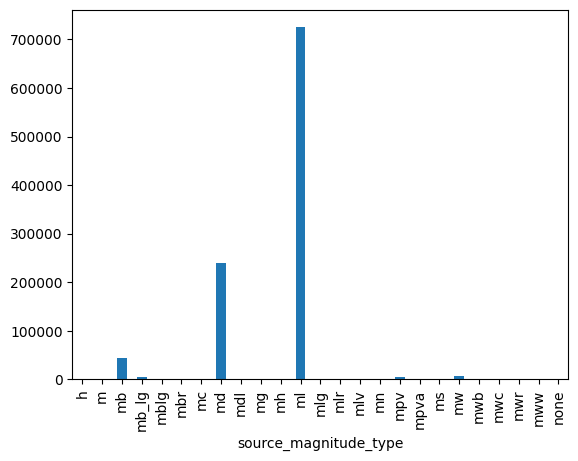

In [16]:
df_earthquakes.groupby('source_magnitude_type').size().plot(kind='bar')

<Axes: xlabel='source_magnitude'>

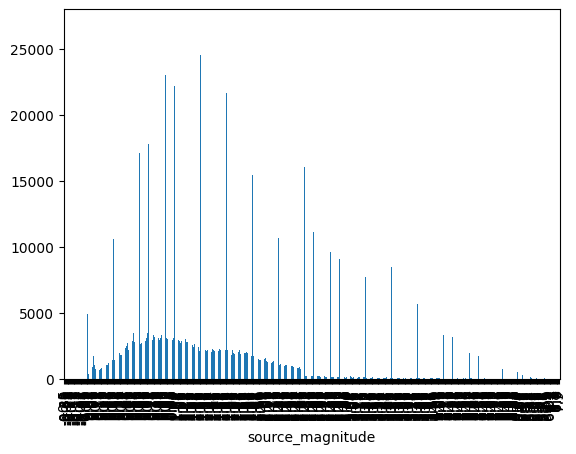

In [17]:
df_earthquakes.groupby('source_magnitude').size().plot(kind='bar')

**MODELO DE REGRESIÓN MÚLTIPLE**

Se aplicará un algoritmo de regresión múltiple con la magnitud del terremoto como variable objetivo puesto que resulta apropiado por distintas razones:
* Se desean evaluar relaciones complejas entre variables relevantes.  En el contexto de los datos sísmicos, esto es relevante, ya que la magnitud del terremoto está influenciada por factores geográficos y geofísicos.
* Se desea predecir la magnitud de futuros terremotos y comprender y analizar la relación causal que tienen las variables.  Por ejemplo, observar si a más profundidad, más daño superficial (caída de edificios, naturaleza, bienes materiales).
* La investigación sísmica se basa sobre todo en hallar posibles correlaciones entre distintos factores, por lo que la regresión puede explorar nuevas hipótesis.
* La regresión múltiple es un modelo básico pero a su vez potente, pues puede ser modificado para incluir efectos no lneales e interacciones entre variables.  Es capaz de adaptarse a la heterocedasticidad (varianza cambiante) o autocorrelación en los datos,

Primero se pasará la variable 'source_magnitude_type', que podría ser importante, a formato one-hot, pues toma valores como 'ml', 'mb', etc.  

In [18]:
import pandas as pd

dummies = pd.get_dummies(df_earthquakes['source_magnitude_type'], prefix='mag_type')

df_earthquakes= pd.concat([df_earthquakes, dummies], axis=1)
df_earthquakes.drop('source_magnitude_type', axis=1, inplace=True)

print(df_earthquakes.head())

                          network_code receiver_code receiver_type  \
trace_name                                                           
109C.TA_20060723155859_EV           TA          109C            BH   
109C.TA_20061103155652_EV           TA          109C            BH   
109C.TA_20061103161223_EV           TA          109C            BH   
109C.TA_20061114133221_EV           TA          109C            BH   
109C.TA_20061127104640_EV           TA          109C            BH   

                           receiver_latitude  receiver_longitude  \
trace_name                                                         
109C.TA_20060723155859_EV            32.8889           -117.1051   
109C.TA_20061103155652_EV            32.8889           -117.1051   
109C.TA_20061103161223_EV            32.8889           -117.1051   
109C.TA_20061114133221_EV            32.8889           -117.1051   
109C.TA_20061127104640_EV            32.8889           -117.1051   

                           recei

Tras investigar sobre los tipos de magnitudes y las distintas escalas en las que se clasifican, se van a tomar en cuenta solamente las más comunes, que son: mb, ml y ms.  Las demás se eliminarán.

In [19]:
df_earthquakes = df_earthquakes.drop(['mag_type_h', 'mag_type_m','mag_type_mb_lg','mag_type_mblg','mag_type_mbr', 'mag_type_mdl','mag_type_mg','mag_type_mh','mag_type_mc','mag_type_md','mag_type_mlg','mag_type_mlr',
                                     'mag_type_mlv','mag_type_mn','mag_type_mpv','mag_type_mpva','mag_type_mw','mag_type_mwb','mag_type_mwc','mag_type_mwr',
                                     'mag_type_mww'], axis=1)

A continuación se graficará la matriz de correlación teniendo en cuenta las variables del dataset que aparentemente pueden influir más en la magnitud del movimiento sísmico.

In [20]:
import pandas as pd
selected_columns = df_earthquakes[['source_magnitude','source_latitude', 'source_longitude','mag_type_mb','mag_type_ml','mag_type_ms','p_weight','p_travel_sec','receiver_elevation_m','back_azimuth_deg','source_depth_km','p_arrival_sample','receiver_latitude','receiver_longitude']] 
correlation_matrix = selected_columns.corr()

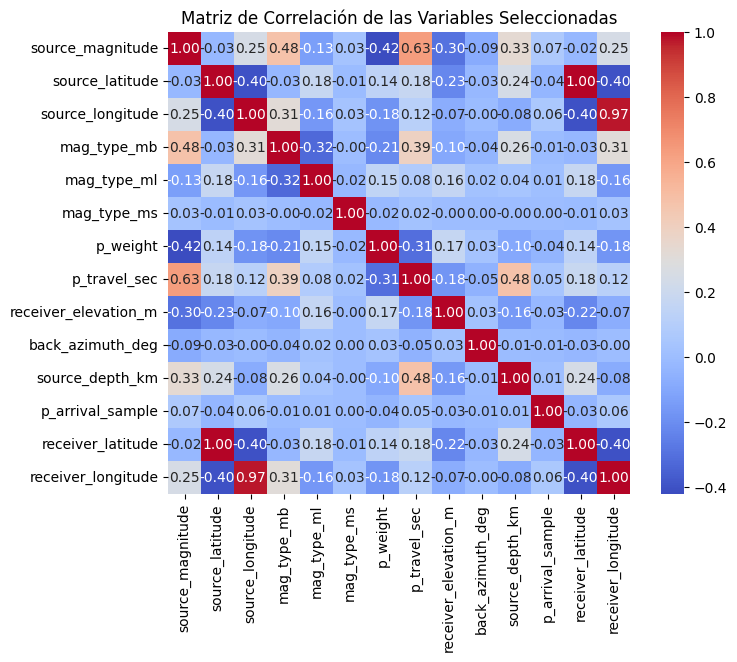

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriz de Correlación de las Variables Seleccionadas')

plt.show()

Para la regresión, es preciso escoger las variables predictoras que más relación guarden con la variable objetivo.  A su vez, dichas variables no deben presentar multicolinealidad entre ellas.  Para predecir la magnitud, se han elegido las siguientes variables independientes tras estudiar la correlación entre variables:
*
mag_type_mb,mag_type_none,p_travel_sec,p_weight,receiver_elevation_m,receiver_latitude,source_longitude,source_depth_km.*

Después de probar varios modelos de regresión, el realizado con estas variables ha sido el más sencillo que maximiza el R^2.  La elección de dichas variables ha sido, por una parte, intuitiva: la profundidad del terremoto afecta a los daños causados en la superficie (lo cual está muy relacionado con la magnitud); también se sabe que, por condiciones geofísicas y de geolocalización, ciertas ubicaciones son más propensas a los terremotos que otras, como Chile o Japón; y el tipo de magnitud se ve intuitivamente que está altamente relacionado con la magnitud total.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_earthquakes[['mag_type_mb','p_travel_sec','p_weight','receiver_elevation_m','receiver_latitude',
                    'source_longitude','source_depth_km','mag_type_none']] 

y = df_earthquakes['source_magnitude']  # var objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.4347628658601463
R^2: 0.5432899967679191


El mejor modelo y el más simple obtenido ha sido este con un R^2 cercano a 0.55.  Para ser un buen modelo, debería al menos tener un 0.7, pero no se ha podido hacer una regresión mejor.  Podría mejorarse centrándose aún más en la ingeniería de características y teniendo en cuenta más variables.

Con respecto al MSE, el modelo difiere de los valores reales en un 0.43. 